# What is the problem?
Predict the survival of passengers on the Titanic, a classic binary classification problem. The objective is to model the probability that a passenger survived based on various features.

# What is the type of machine learning?
The approach used is supervised learning because the model is trained using a dataset that includes both the input features (predictors) and the output label (the target variable 'Survived'). Specifically, the technique applied is logistic regression, which is used for binary classification tasks.

# What are the feature variables and target variables?
## Target Variable: 'Survived'
  This is what the model is trying to predict: whether a passenger survived (1) or did not survive (0
## Feature Variables:
'Travel_Class', 'Sex', 'Age', 'NumSiblings_Spouses',
       'NumParents_Children', 'Embarked').

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Dataset/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
updated_df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']].reset_index(drop=True)
updated_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
updated_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [7]:
updated_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [8]:
for column in updated_df[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch',
       'Embarked']]:
    print(updated_df[column].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [9]:
female_df = updated_df[updated_df['Sex'] == 'female']
male_df = updated_df[updated_df['Sex'] == 'male']

In [10]:
print(female_df.isna().sum())
print(male_df.isna().sum())

Survived     0
Pclass       0
Sex          0
Age         53
SibSp        0
Parch        0
Fare         0
Embarked     2
dtype: int64
Survived      0
Pclass        0
Sex           0
Age         124
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64


In [11]:
female_df.Age.fillna(female_df.Age.median(), inplace=True)
male_df.Age.fillna(male_df.Age.median(), inplace=True)

C:\Users\x-ibah\AppData\Local\Temp\ipykernel_12588\3439835809.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  female_df.Age.fillna(female_df.Age.median(), inplace=True)
C:\Users\x-ibah\AppData\Local\Temp\ipykernel_12588\3439835809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_df.Age.fillna(female_df.Age.median(), inplace=True)

In [12]:
female_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [13]:
updated_df = pd.concat([female_df, male_df], ignore_index=True)
updated_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,female,38.0,1,0,71.2833,C
1,1,3,female,26.0,0,0,7.9250,S
2,1,1,female,35.0,1,0,53.1000,S
3,1,3,female,27.0,0,2,11.1333,S
4,1,2,female,14.0,1,0,30.0708,C


In [14]:
# Shuffle the DataFrame
updated_df = updated_df.sample(frac=1).reset_index(drop=True)
updated_df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,female,60.0,1,0,75.2500,C
1,0,3,male,42.0,0,0,7.5500,S
2,1,3,female,27.0,0,2,11.1333,S


In [15]:
updated_df[updated_df.isna().any(axis=1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
50,1,1,female,38.0,0,0,80.0,NaN
742,1,1,female,62.0,0,0,80.0,NaN


In [16]:
updated_df[(updated_df.SibSp == 0) & (updated_df.Parch == 0)].head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,0,3,male,42.0,0,0,7.5500,S
3,1,3,female,16.0,0,0,7.7500,Q
4,0,3,male,38.0,0,0,7.8958,S
7,1,3,female,13.0,0,0,7.2292,C
8,0,1,male,55.0,0,0,30.5000,S
11,0,3,male,36.0,0,0,7.4958,S
12,0,2,male,18.0,0,0,13.0000,S
13,1,1,male,45.0,0,0,26.5500,S
14,1,1,male,40.0,0,0,31.0000,C
15,1,3,male,29.0,0,0,56.4958,S


In [17]:
updated_df[(updated_df.Embarked == 'C')].head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,female,60.0,1,0,75.2500,C
7,1,3,female,13.0,0,0,7.2292,C
14,1,1,male,40.0,0,0,31.0000,C
18,0,1,male,36.0,0,0,40.1250,C
19,0,3,male,33.0,0,0,7.8958,C
37,0,3,male,35.0,0,0,7.8958,C
39,1,3,female,5.0,2,1,19.2583,C
44,0,3,male,29.0,0,0,7.2292,C
55,1,3,female,27.0,0,2,22.3583,C
72,0,1,male,30.0,0,0,27.7500,C


In [18]:
updated_df.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [19]:
updated_df.Embarked.fillna('S', inplace=True)

C:\Users\x-ibah\AppData\Local\Temp\ipykernel_12588\2025516742.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  updated_df.Embarked.fillna('S', inplace=True)


In [20]:
updated_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [21]:
updated_df[updated_df.duplicated()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
84,0,3,male,20.0,0,0,7.8542,S
91,1,3,male,29.0,0,0,56.4958,S
97,0,3,male,29.0,0,0,7.8958,S
98,0,3,male,29.0,0,0,7.8958,S
104,1,3,female,27.0,0,0,7.7500,Q
...,...,...,...,...,...,...,...,...
856,0,3,male,35.0,0,0,8.0500,S
865,0,3,female,27.0,8,2,69.5500,S
879,0,3,male,29.0,0,0,7.8958,S
884,0,3,male,29.0,0,0,8.0500,S


In [22]:
updated_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [23]:
updated_df[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']] = updated_df[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']].astype('category')

In [24]:
updated_df['Age'] = updated_df['Age'].astype('int')

In [25]:
updated_df['Fare'] = round(updated_df['Fare'], 2)

In [26]:
Survived.dtypes

Survived    category
Pclass      category
Sex         category
Age            int32
SibSp       category
Parch       category
Fare         float64
Embarked    category
dtype: object

In [ ]:
cleaned_df = Survived

In [41]:
## Feature Engineering

In [ ]:
ml_df = cleaned_df

In [31]:
# Create the engine_codes variable by encoding engine_size
ml_df['Sex'] = ml_df['Sex'].cat.codes

In [33]:
# Create the engine_codes variable by encoding engine_size
ml_df['Embarked_encoded'] = ml_df['Embarked'].cat.codes

In [34]:
updated_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Parch_,Embarked_encoded
0,1,1,0,60,1,0,75.25,C,0,0
1,0,3,1,42,0,0,7.55,S,0,2
2,1,3,0,27,0,2,11.13,S,2,2
3,1,3,0,16,0,0,7.75,Q,0,1
4,0,3,1,38,0,0,7.90,S,0,2


In [30]:
ml_df.dtypes

Survived    category
Pclass      category
Sex         category
Age            int32
SibSp       category
Parch       category
Fare         float64
Embarked    category
Parch_          int8
dtype: object

<Axes: xlabel='Age', ylabel='Fare'>

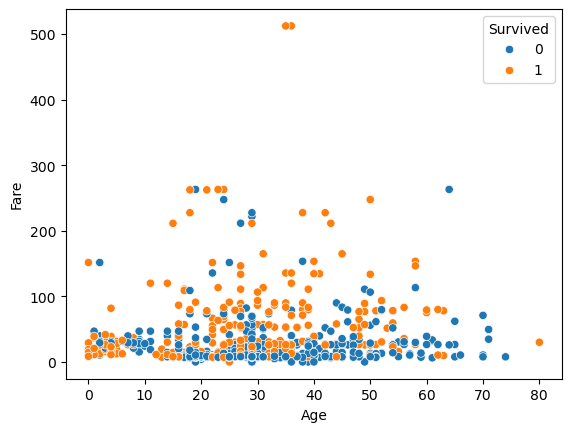

In [35]:
sns.scatterplot(data= ml_df, x='Age', y='Fare', hue='Survived')

<Axes: xlabel='Age', ylabel='Fare'>

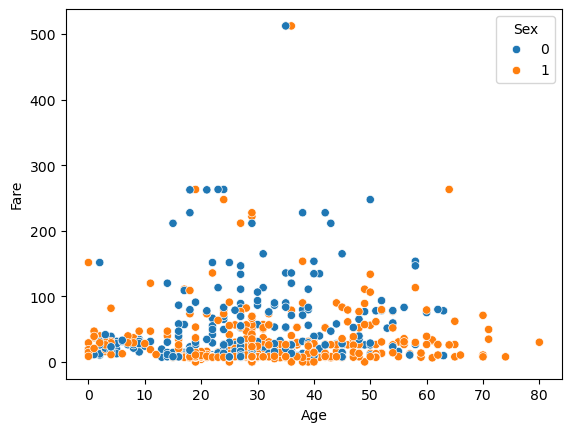

In [36]:
sns.scatterplot(data= updated_df, x='Age', y='Fare', hue='Sex')

<Axes: xlabel='Age', ylabel='Survived'>

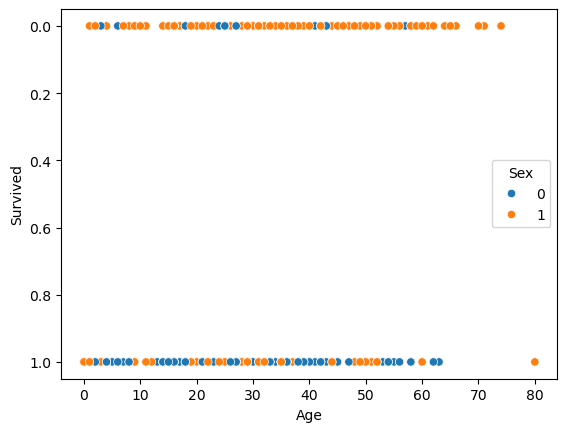

In [37]:
sns.scatterplot(data= ml_df, x='Age', y='Survived', hue='Sex')

<Axes: xlabel='Survived', ylabel='Age'>

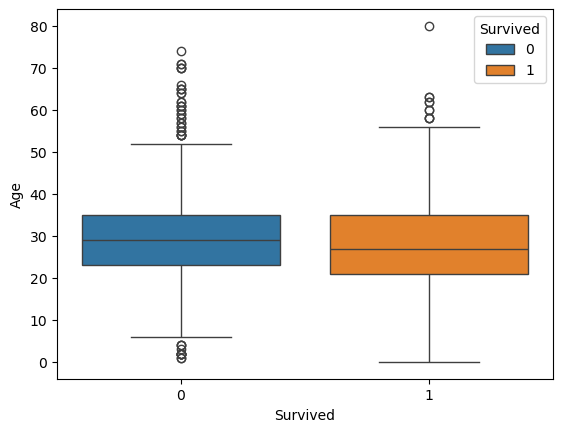

In [40]:
sns.boxplot(data=ml_df, x='Survived', y='Age', hue='Survived')

In [12]:
# Splitting the dataset
X = ml_df.drop('Survived', axis=1)
y = ml_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

# What machine learning algorithms were used? 
The machine learning algorithm used was logistic regression, a popular method for binary classification tasks

# Which is better?

Given thatheur target variable nd binary (either 0 or 1), logistic regression is indeed a suitabl
and often highly effective choice for such classification problemse 

# What evaluation metric do you prefer?
## Accuracy
Measures the overall correctness of the model (i.e., the ratio of correct predictions to the total number of samples).
## Precision (Positive Predictive Value
Measures the ratio of correct positive predictions to the total predicted positives. It answers the question: Of all samples labeled as positive, how many actually belong to the positive class?
## Recall (Sensitivity, True Positive Rate)
Measures the ratio of correct positive predictions made in relation to all actual positives
## F1-Score 
The harmonic mean of precision and recall. It is used to balance the trade-off between precision and recall, particularly when you have class imbalance.

# How did you evaluate models performance?
Model 1 outperforms the other **models** across all the metrics used.

**Highest Accuracy:** Model 1 has the highest accuracy (0.793), indicating that it correctly predicts a larger percentage of the total outcomes.ly.

**Highest Precision:** Model 1 also leads in precision (0.7), which suggests that it is better at predicting positive instances among the instances it predicts as positive.



**Highest Recall:** Model 1 shows the highest recall (0.753), which means it is better at identifying all relevant instances.

**Highest F1-Score:** Model 1 again has the highest F1-score (0.726), balancing precision and recall effectively.

# How did you diagnose the model? 

# What is your model's results? Is it good? Do you have any concerns?
Model appears to be performing well with no major signs of overfitting or underfitting.


The model's performance is evaluated using several metrics which demonstrate how accurately it predicts outcomes, both during training and testing phases. In training, it achieved an accuracy o**f 79.3**5%, a precision o**f 7**5%, a recall o**f 70.3**9%, and an F1-score o**f 72.6**6%. Similarly, in testing, it maintained consistent performance with an accuracy o**f 79.3**3%, precision o**f 7**0%, recall o**f 75.3**8%, and an F1-score o**f 72.5**9%. These metrics indicate that the model is reliable and generalizes well to new, unseen data, suggesting a balanced approach between how often it is correct (precision) and how complete its predictions are (recall).

# Do you have any concerns?
The slight difference in precision between the training (0.75) and testing (0.70) metrics. 
While the precision difference is not large, it's good practice to monitor such changes as they might indicate how the model will perform as more data is introduced or in different operational settings. It might also be beneficial to look into model tuning or regularization techniques to minimize overfitting, ensuring that the model remains generalizable and robust.